## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.575482  1.001608  1.600892 -0.942048 -1.729156 -0.158964
1  0.419617 -1.596082 -1.493097  1.415837 -1.030215 -0.029789
2  0.073779  0.307499 -1.307912  0.465746 -0.352803  1.059249
3  0.001754  1.263279 -0.467226  0.839588  1.576938  1.640655
4 -0.033854 -0.749297 -1.099097  1.569204  0.720105  0.969441


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8937610	total: 46.8ms	remaining: 46.7s
1:	learn: 0.8840928	total: 47.2ms	remaining: 23.5s
2:	learn: 0.8748712	total: 47.6ms	remaining: 15.8s
3:	learn: 0.8654823	total: 48ms	remaining: 12s
4:	learn: 0.8576098	total: 48.4ms	remaining: 9.63s
5:	learn: 0.8487890	total: 48.8ms	remaining: 8.08s
6:	learn: 0.8399796	total: 49.1ms	remaining: 6.97s
7:	learn: 0.8311442	total: 49.5ms	remaining: 6.13s
8:	learn: 0.8229927	total: 49.8ms	remaining: 5.49s
9:	learn: 0.8143563	total: 50.2ms	remaining: 4.97s
10:	learn: 0.8056991	total: 50.5ms	remaining: 4.54s
11:	learn: 0.7964855	total: 50.9ms	remaining: 4.19s
12:	learn: 0.7879608	total: 51.2ms	remaining: 3.89s
13:	learn: 0.7804099	total: 51.7ms	remaining: 3.64s
14:	learn: 0.7734042	total: 52ms	remaining: 3.42s
15:	learn: 0.7659899	total: 52.4ms	remaining: 3.22s
16:	learn: 0.7584320	total: 52.8ms	remaining: 3.05s
17:	learn: 0.7511886	total: 53.2ms	remaining: 2.9s
18:	learn: 0.7445652	total: 53.6ms	remaining: 2.77s

212:	learn: 0.1610648	total: 121ms	remaining: 447ms
213:	learn: 0.1596128	total: 122ms	remaining: 446ms
214:	learn: 0.1584355	total: 122ms	remaining: 445ms
215:	learn: 0.1573182	total: 122ms	remaining: 444ms
216:	learn: 0.1564827	total: 123ms	remaining: 442ms
217:	learn: 0.1554333	total: 123ms	remaining: 441ms
218:	learn: 0.1545347	total: 123ms	remaining: 440ms
219:	learn: 0.1535102	total: 124ms	remaining: 439ms
220:	learn: 0.1525853	total: 124ms	remaining: 438ms
221:	learn: 0.1515646	total: 125ms	remaining: 436ms
222:	learn: 0.1505411	total: 125ms	remaining: 435ms
223:	learn: 0.1493793	total: 125ms	remaining: 434ms
224:	learn: 0.1481083	total: 126ms	remaining: 433ms
225:	learn: 0.1471557	total: 126ms	remaining: 432ms
226:	learn: 0.1462036	total: 126ms	remaining: 430ms
227:	learn: 0.1451487	total: 127ms	remaining: 429ms
228:	learn: 0.1442102	total: 127ms	remaining: 428ms
229:	learn: 0.1432403	total: 127ms	remaining: 427ms
230:	learn: 0.1423257	total: 128ms	remaining: 426ms
231:	learn: 

495:	learn: 0.0416040	total: 226ms	remaining: 229ms
496:	learn: 0.0414533	total: 226ms	remaining: 229ms
497:	learn: 0.0413272	total: 227ms	remaining: 228ms
498:	learn: 0.0411770	total: 227ms	remaining: 228ms
499:	learn: 0.0409764	total: 227ms	remaining: 227ms
500:	learn: 0.0408041	total: 228ms	remaining: 227ms
501:	learn: 0.0406602	total: 228ms	remaining: 226ms
502:	learn: 0.0405399	total: 228ms	remaining: 226ms
503:	learn: 0.0403994	total: 229ms	remaining: 225ms
504:	learn: 0.0402340	total: 229ms	remaining: 225ms
505:	learn: 0.0400540	total: 230ms	remaining: 224ms
506:	learn: 0.0399269	total: 230ms	remaining: 224ms
507:	learn: 0.0397914	total: 230ms	remaining: 223ms
508:	learn: 0.0396784	total: 231ms	remaining: 223ms
509:	learn: 0.0395461	total: 231ms	remaining: 222ms
510:	learn: 0.0393604	total: 231ms	remaining: 221ms
511:	learn: 0.0391805	total: 232ms	remaining: 221ms
512:	learn: 0.0390062	total: 232ms	remaining: 220ms
513:	learn: 0.0388374	total: 233ms	remaining: 220ms
514:	learn: 

772:	learn: 0.0148785	total: 328ms	remaining: 96.4ms
773:	learn: 0.0148159	total: 329ms	remaining: 96ms
774:	learn: 0.0147536	total: 329ms	remaining: 95.5ms
775:	learn: 0.0146911	total: 329ms	remaining: 95.1ms
776:	learn: 0.0146261	total: 330ms	remaining: 94.7ms
777:	learn: 0.0145643	total: 330ms	remaining: 94.3ms
778:	learn: 0.0145323	total: 331ms	remaining: 93.8ms
779:	learn: 0.0144307	total: 331ms	remaining: 93.4ms
780:	learn: 0.0143702	total: 332ms	remaining: 93ms
781:	learn: 0.0143075	total: 332ms	remaining: 92.5ms
782:	learn: 0.0142577	total: 332ms	remaining: 92.1ms
783:	learn: 0.0141586	total: 333ms	remaining: 91.7ms
784:	learn: 0.0140984	total: 333ms	remaining: 91.2ms
785:	learn: 0.0140410	total: 333ms	remaining: 90.8ms
786:	learn: 0.0139827	total: 334ms	remaining: 90.3ms
787:	learn: 0.0139578	total: 334ms	remaining: 89.9ms
788:	learn: 0.0138984	total: 335ms	remaining: 89.5ms
789:	learn: 0.0138739	total: 335ms	remaining: 89.1ms
790:	learn: 0.0138041	total: 335ms	remaining: 88.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

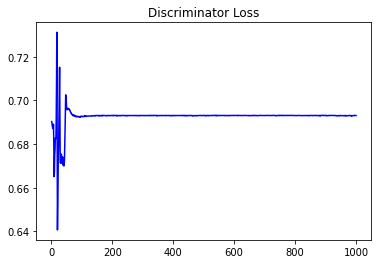

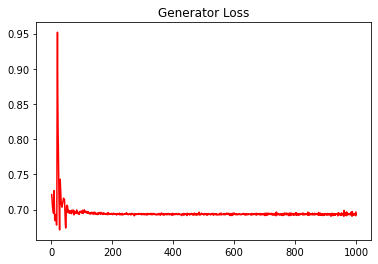

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2770035553753649


#### Sanity Checks 

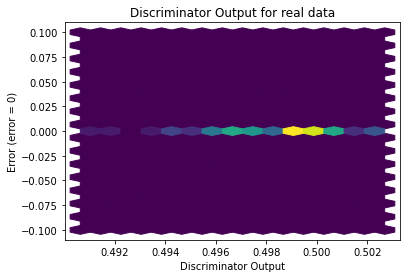

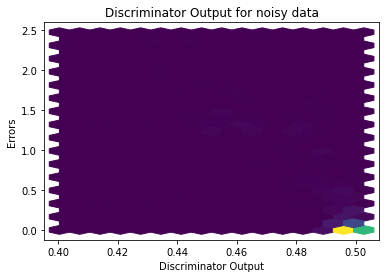

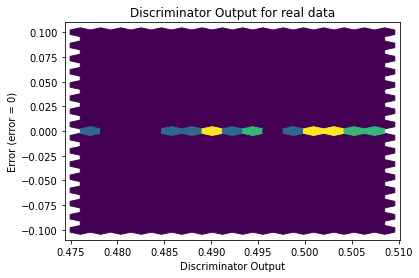

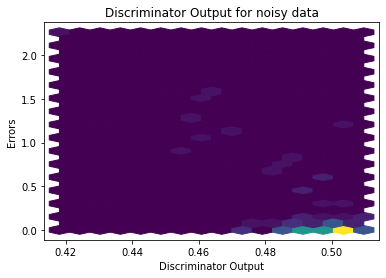

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


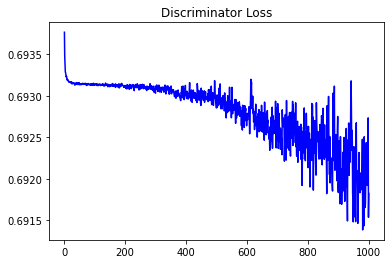

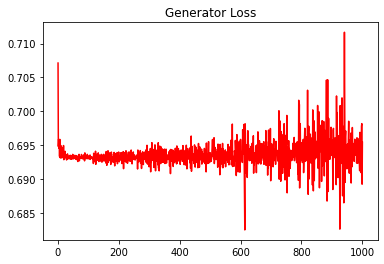

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4088540225403744


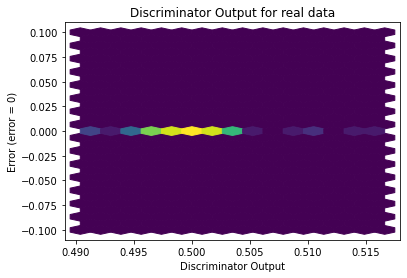

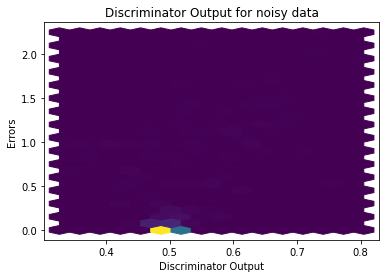

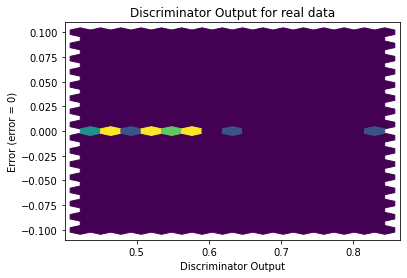

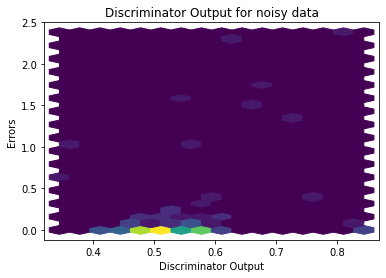

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
